In [2]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk import word_tokenize
import re
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

In [3]:
url = "https://raw.githubusercontent.com/LunaHub/Friends_social_data_analysis_2019/master/data/All_Friends_data.csv"
df = pd.read_csv(url, error_bad_lines=False)

In [4]:
df = df.drop("Unnamed: 0",axis=1)

In [5]:
df.head()

,Speaker,Text,Episode,Scene
0,monica,"oh, the way you crushed mike at ping pong was...",1001,"[scene barbados, monica and chandler's room. t..."
1,chandler,"you know, i'd love to, but i'm a little tired.",1001,"[scene barbados, monica and chandler's room. t..."
2,monica,i'll put a pillowcase over my head.,1001,"[scene barbados, monica and chandler's room. t..."
3,chandler,you're on!,1001,"[scene barbados, monica and chandler's room. t..."
4,phoebe,hey!,1001,"[scene barbados, monica and chandler's room. t..."


In [6]:
#joey = joe, rachel = rach, monica = mon, phoebe = phoebs = phoeb
mainch = ["joey","rachel","ross","chandler","monica","phoebe"]

In [7]:
# function for clearing lines
def cleanLines(line):
    #Exclude links
    line = re.sub(r'\([^)]*\)','',line)
    #Remove everything besides letters
    line = re.sub("([^a-z \t])|(\w+:\/\/\S+)", "", line)
    #Create a string for tweet
    line = [''.join(s for s in line)]
    return(line) 

In [8]:
#Create list for what characters says. allsays[0] is what joey says, allsays[5] is phoebe
allsays = list()
for character in mainch:
    says = df.Text[[character in i for i in df.Speaker.str.split("\b")]].reset_index(drop=True)
    sayscont = list()
    for i in range(len(says)):
        sayscont.extend(cleanLines(says[i]))
    allsays.append(sayscont)

In [9]:
#Add words to stopwords
stopWords = nltk.corpus.stopwords.words('english')
newStopWords = ["like","get","yeah","know","gonna","hey","uh","oh","well","okay","im","dont","youre","thats","got"]
stopWords.extend(newStopWords)


In [10]:
#create list of real words
english_vocab = set(w.lower() for w in nltk.corpus.words.words())

In [11]:
#Create list for all words
allwords = list()

#Create list for character
joeysays = []
for i in range(len(allsays[0])):
    words = [w for w in allsays[0][i].split() if w in english_vocab and w not in stopWords]
    joeysays.extend(words)
allwords.extend(joeysays)

In [12]:
n = 1
rachelsays = []
for i in range(len(allsays[n])):
    words = [w for w in allsays[n][i].split() if w in english_vocab and w not in stopWords]
    rachelsays.extend(words)
allwords.extend(rachelsays)

n+=1
rosssays = []
for i in range(len(allsays[n])):
    words = [w for w in allsays[n][i].split() if w in english_vocab and w not in stopWords]
    rosssays.extend(words)
allwords.extend(rosssays)
    
n+=1
chandlersays = []
for i in range(len(allsays[n])):
    words = [w for w in allsays[n][i].split() if w in english_vocab and w not in stopWords]
    chandlersays.extend(words)
allwords.extend(chandlersays)

n+=1
monicasays = []
for i in range(len(allsays[n])):
    words = [w for w in allsays[n][i].split() if w in english_vocab and w not in stopWords]
    monicasays.extend(words)
allwords.extend(monicasays)

n+=1
phoebesays = []
for i in range(len(allsays[n])):
    words = [w for w in allsays[n][i].split() if w in english_vocab and w not in stopWords]
    phoebesays.extend(words)
allwords.extend(phoebesays)


In [13]:
# Calculate the TF of the characters:
theysay = joeysays
TF_joey_words = FreqDist(theysay)
TF_joey = {a:(b/len(theysay)) for (a,b) in TF_joey_words.most_common()}
# Calculate the TF
TF_joey_words = FreqDist(theysay)
TF_joey = {a:(b/len(theysay)) for (a,b) in TF_joey_words.most_common()}

theysay = rachelsays
TF_rac_words = FreqDist(theysay)
TF_rac = {a:(b/len(theysay)) for (a,b) in TF_rac_words.most_common()}
# Calculate the TF
TF_rac_words = FreqDist(theysay)
TF_rac = {a:(b/len(theysay)) for (a,b) in TF_rac_words.most_common()}

theysay = rosssays
TF_ross_words = FreqDist(theysay)
TF_ross = {a:(b/len(theysay)) for (a,b) in TF_ross_words.most_common()}
# Calculate the TF
TF_ross_words = FreqDist(theysay)
TF_ross = {a:(b/len(theysay)) for (a,b) in TF_ross_words.most_common()}

theysay = chandlersays
TF_cha_words = FreqDist(theysay)
TF_cha = {a:(b/len(theysay)) for (a,b) in TF_cha_words.most_common()}
# Calculate the TF
TF_cha_words = FreqDist(theysay)
TF_cha = {a:(b/len(theysay)) for (a,b) in TF_cha_words.most_common()}

theysay = monicasays
TF_mon_words = FreqDist(theysay)
TF_mon = {a:(b/len(theysay)) for (a,b) in TF_mon_words.most_common()}
# Calculate the TF
TF_mon_words = FreqDist(theysay)
TF_mon = {a:(b/len(theysay)) for (a,b) in TF_mon_words.most_common()}

theysay = phoebesays
TF_pho_words = FreqDist(theysay)
TF_pho = {a:(b/len(theysay)) for (a,b) in TF_pho_words.most_common()}
# Calculate the TF
TF_pho_words = FreqDist(theysay)
TF_pho = {a:(b/len(theysay)) for (a,b) in TF_pho_words.most_common()}


In [14]:
# Calculate the IDF for each word:
IDF = {}
for word in np.unique(allwords):
    denomi = 0
    if word in joeysays: 
        denomi+=1
    if word in rachelsays: 
        denomi+=1
    if word in rosssays: 
        denomi+=1
    if word in chandlersays: 
        denomi+=1
    if word in monicasays: 
        denomi+=1
    if word in phoebesays: 
        denomi+=1

    IDF[word] = np.log( 2 / (denomi))

In [15]:
# Calcualte the TF-IDF of the characters:
#Joey
TF_IDF_joey = {}
for word in TF_joey.items():
    TF_IDF_joey[word[0]] = word[1] * IDF[word[0]]
TF_IDF_joey = sorted(TF_IDF_joey.items(), key=lambda kv: kv[1],reverse = True)

#Rachel
TF_IDF_rac = {}
for word in TF_rac.items():
    TF_IDF_rac[word[0]] = word[1] * IDF[word[0]]
TF_IDF_rac = sorted(TF_IDF_rac.items(), key=lambda kv: kv[1],reverse = True)

#Ross
TF_IDF_ross = {}
for word in TF_ross.items():
    TF_IDF_ross[word[0]] = word[1] * IDF[word[0]]
TF_IDF_ross = sorted(TF_IDF_ross.items(), key=lambda kv: kv[1],reverse = True)

#Chandler
TF_IDF_cha = {}
for word in TF_cha.items():
    TF_IDF_cha[word[0]] = word[1] * IDF[word[0]]
TF_IDF_cha = sorted(TF_IDF_cha.items(), key=lambda kv: kv[1],reverse = True)

#Monica
TF_IDF_mon = {}
for word in TF_mon.items():
    TF_IDF_mon[word[0]] = word[1] * IDF[word[0]]
TF_IDF_mon = sorted(TF_IDF_mon.items(), key=lambda kv: kv[1],reverse = True)

#Phoebe
TF_IDF_pho = {}
for word in TF_pho.items():
    TF_IDF_pho[word[0]] = word[1] * IDF[word[0]]
TF_IDF_pho = sorted(TF_IDF_pho.items(), key=lambda kv: kv[1],reverse = True)


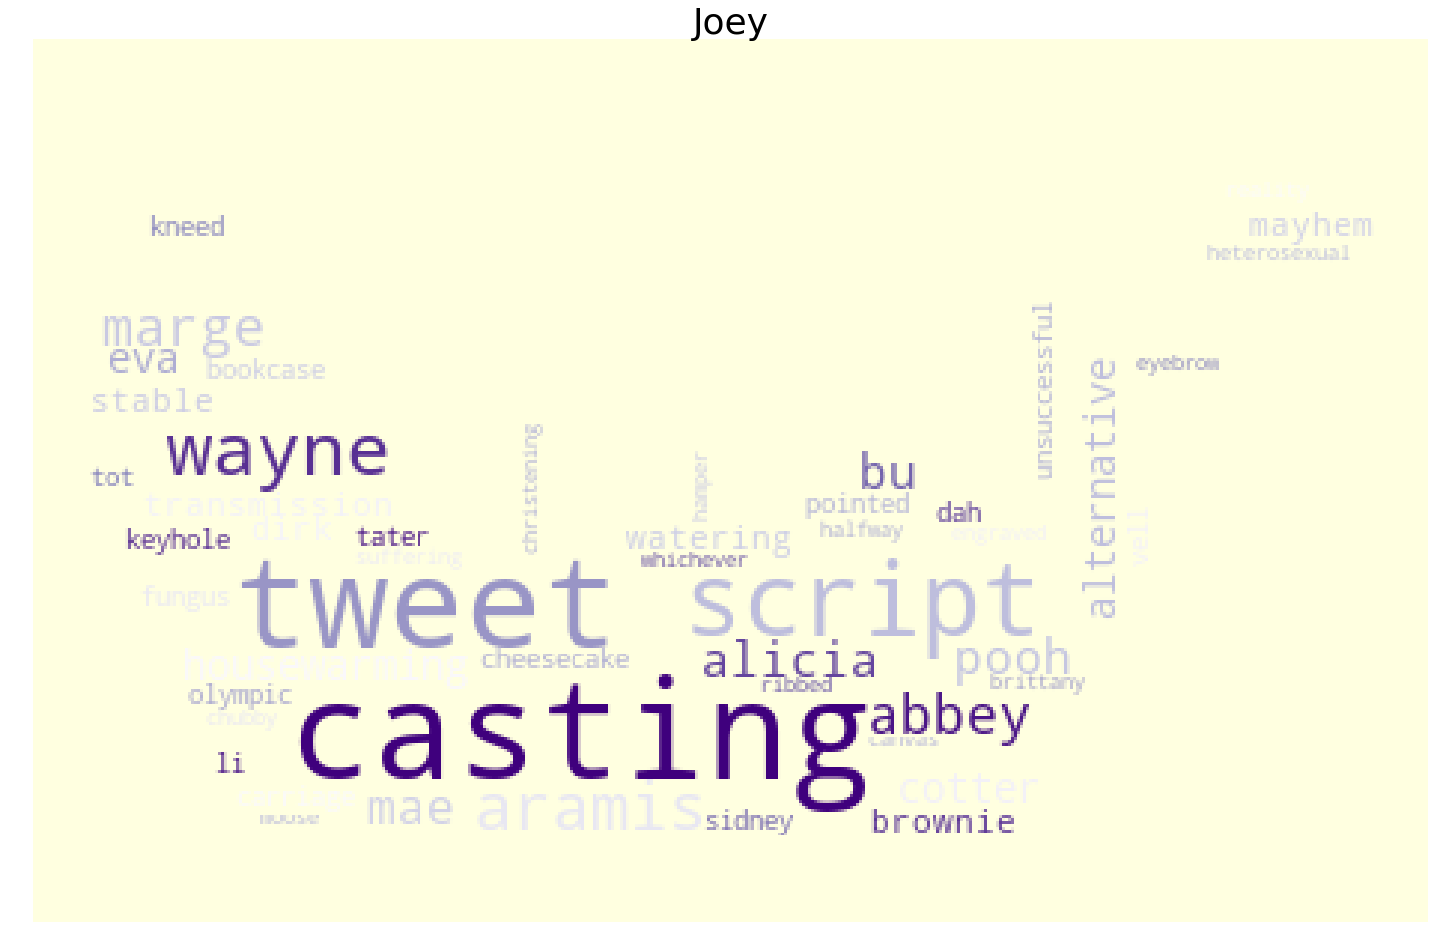

In [45]:
url = "https://raw.githubusercontent.com/LunaHub/Friends_social_data_analysis_2019/master/figures/Friends_siluet.PNG"
response = requests.get(url)
img = np.array(Image.open(BytesIO(response.content)))


plt.figure(figsize = [25,25])
plt.imshow(WordCloud(stopwords=set(list(STOPWORDS) + stopWords),
                     background_color='lightyellow',
                     max_words = 50, colormap = 'Purples',
                    mask = img)
           .generate_from_frequencies(dict(TF_IDF_joey)));
plt.axis('off');
plt.title('Joey',fontsize = 36);
#plt.savefig("wordcloud_Joey_realwords",transparent = True, DPI = 200)
plt.show()

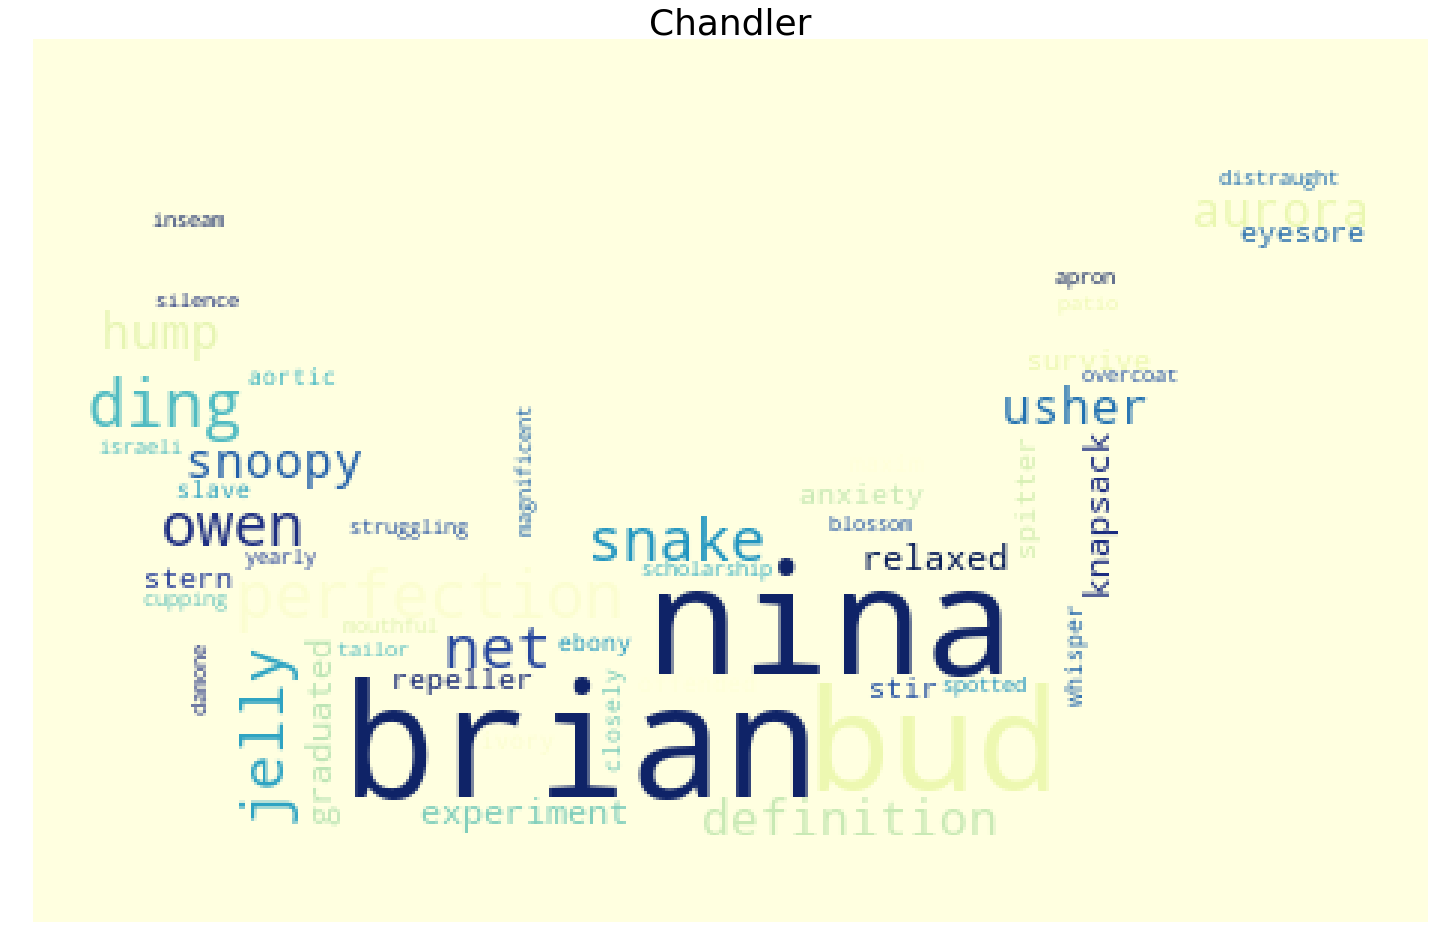

In [46]:
plt.figure(figsize = [25,25])
plt.imshow(WordCloud(stopwords=set(list(STOPWORDS) + stopWords),
                     background_color='lightyellow',
                     max_words = 50, colormap = 'YlGnBu',
                    mask = img)
           .generate_from_frequencies(dict(TF_IDF_cha)));
plt.axis('off');
plt.title('Chandler',fontsize = 36);
#plt.savefig("wordcloud_Chandler_realwords",transparent = True, DPI = 200)
plt.show()

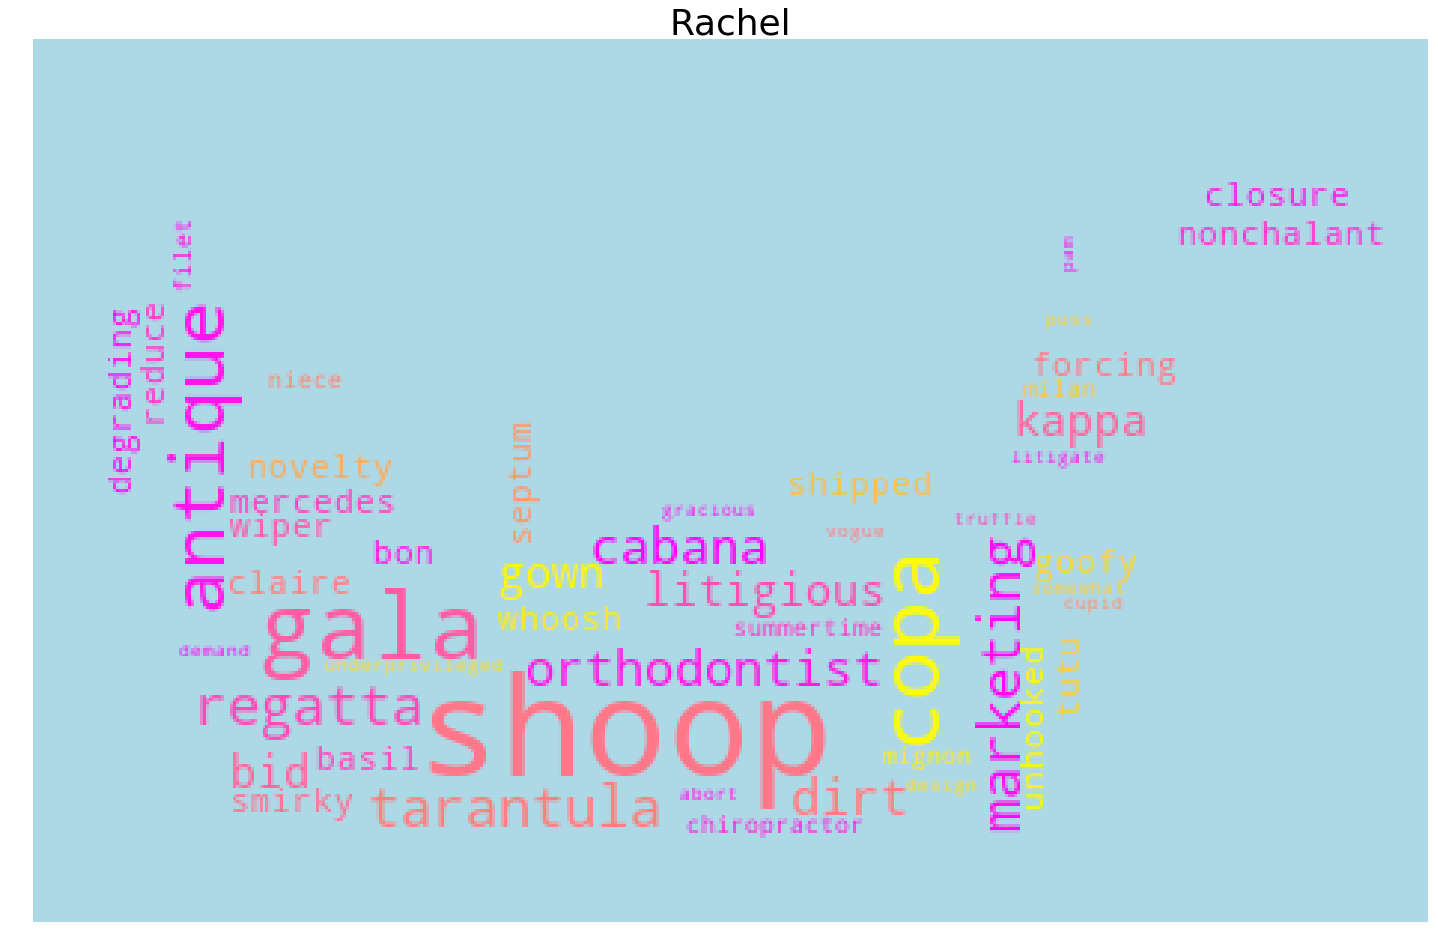

In [47]:
plt.figure(figsize = [25,25])
plt.imshow(WordCloud(stopwords=set(list(STOPWORDS) + stopWords),
                     background_color='lightblue',
                     max_words = 50, colormap = 'spring',
                    mask = img)
           .generate_from_frequencies(dict(TF_IDF_rac)));
plt.axis('off');
plt.title('Rachel',fontsize = 36);
#plt.savefig("wordcloud_Rachel_realwords",transparent = True, DPI = 200)
plt.show()

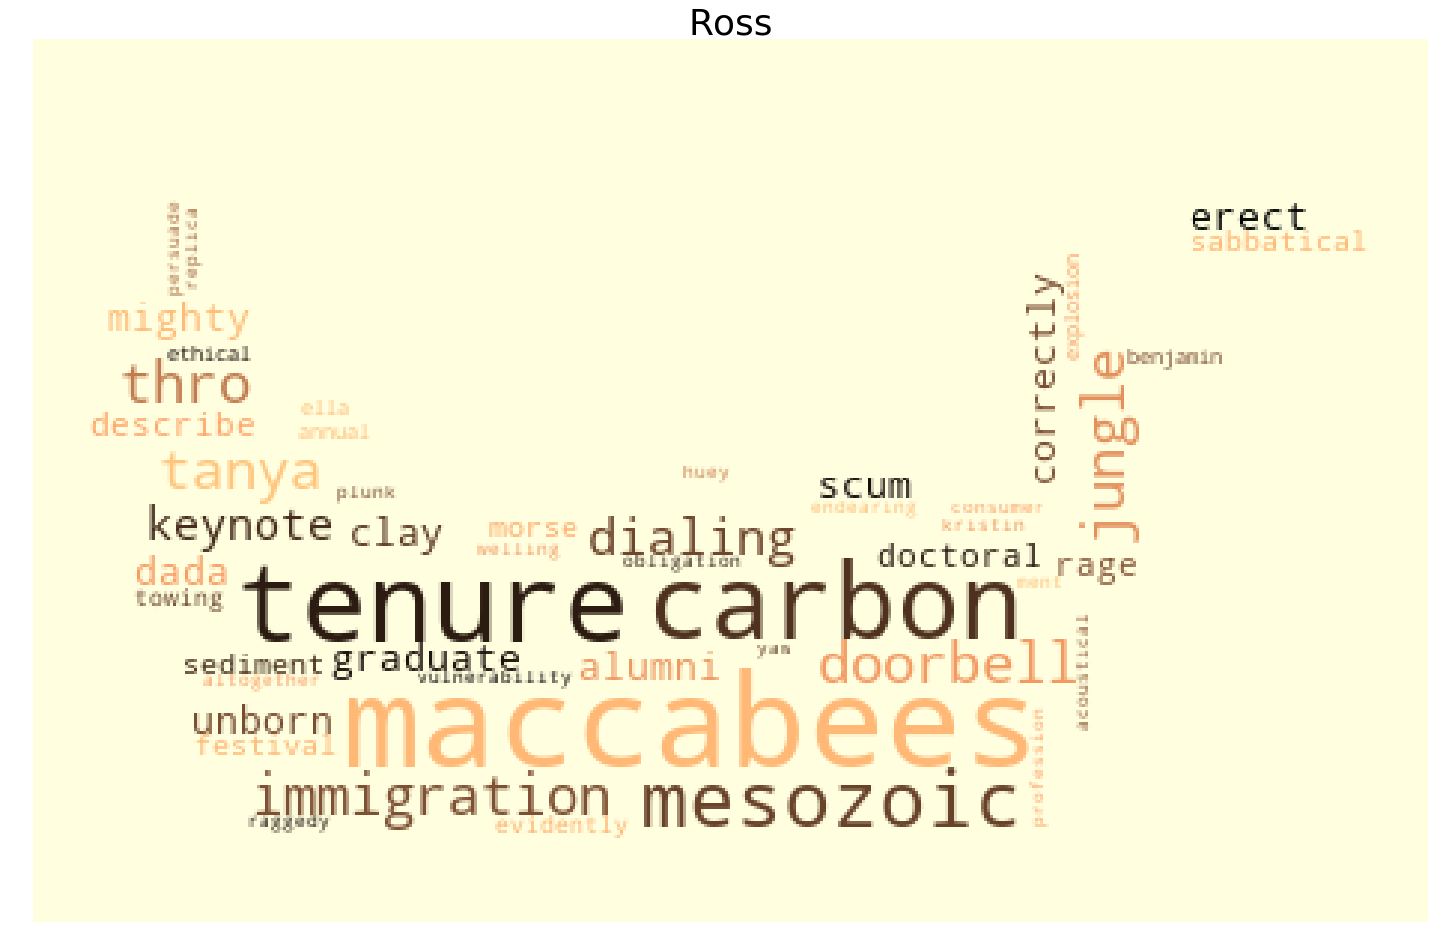

In [48]:
plt.figure(figsize = [25,25])
plt.imshow(WordCloud(stopwords=set(list(STOPWORDS) + stopWords),
                     background_color='lightyellow',
                     max_words = 50, colormap = 'copper',
                    mask = img)
           .generate_from_frequencies(dict(TF_IDF_ross)));
plt.axis('off');
plt.title('Ross',fontsize = 36);
#plt.savefig("wordcloud_Ross_realwords",transparent = True, DPI = 200)
plt.show()

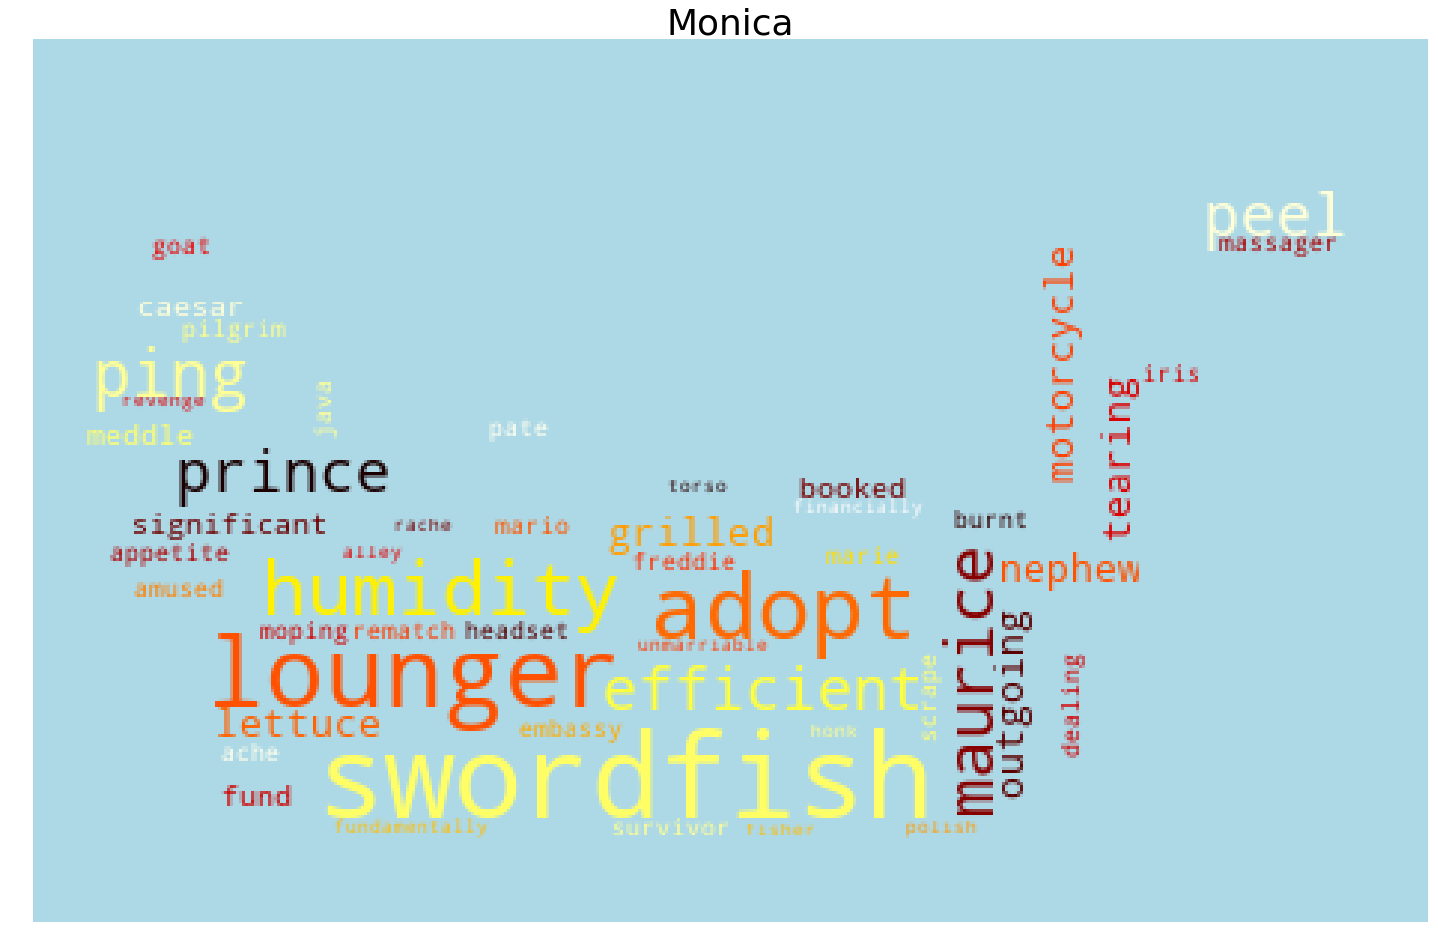

In [49]:
plt.figure(figsize = [25,25])
plt.imshow(WordCloud(stopwords=set(list(STOPWORDS) + stopWords),
                     background_color='lightblue',
                     max_words = 50, colormap = 'hot',
                    mask = img)
           .generate_from_frequencies(dict(TF_IDF_mon)));
plt.axis('off');
plt.title('Monica',fontsize = 36);
#plt.savefig("wordcloud_Monica_realwords",transparent = True, DPI = 200)
plt.show()

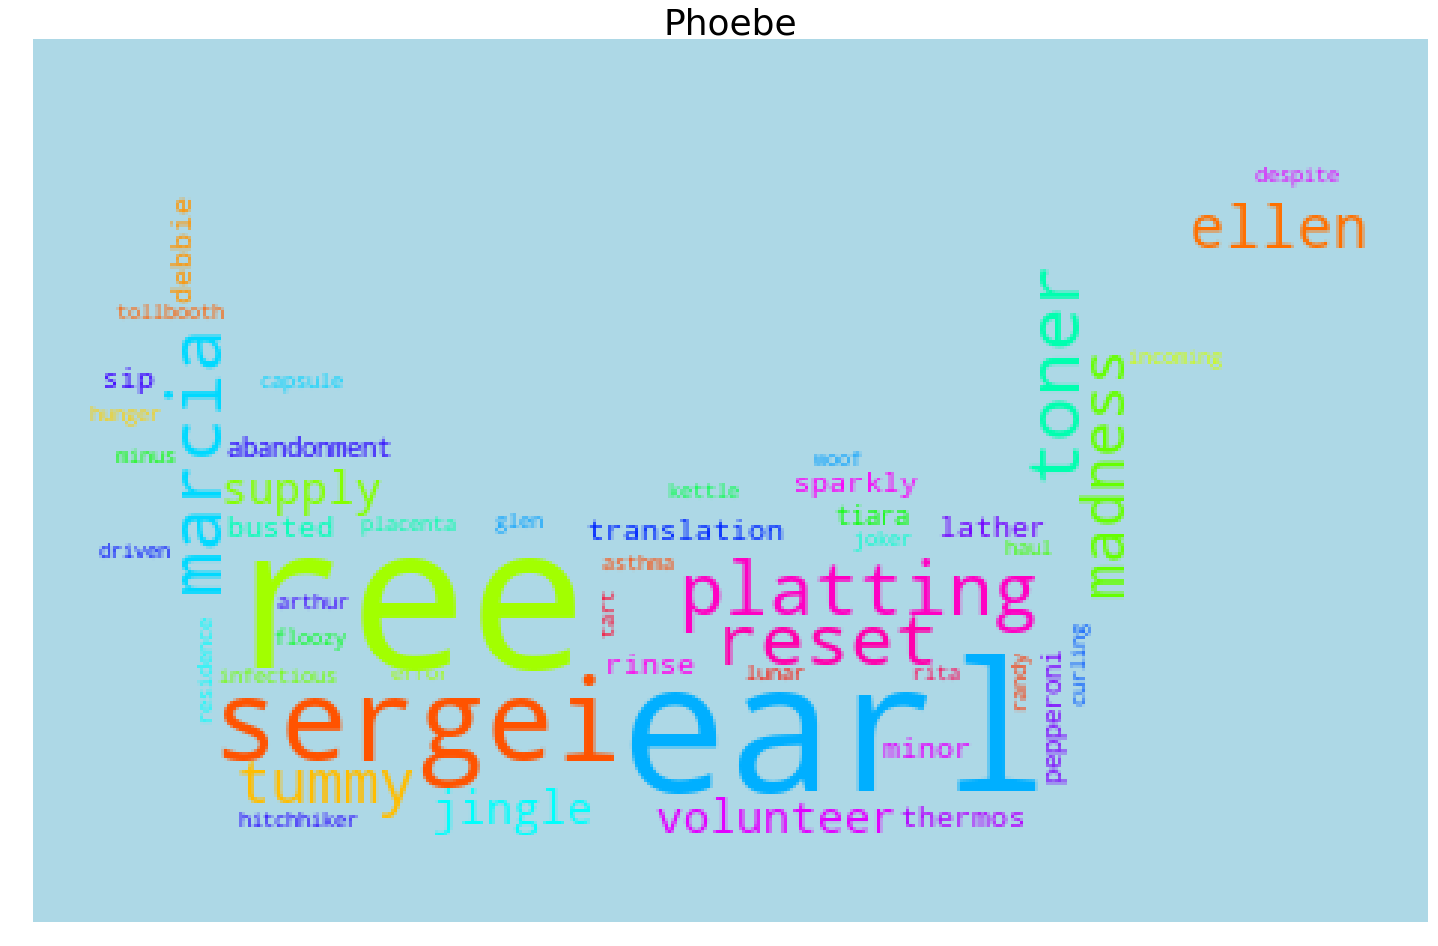

In [50]:
plt.figure(figsize = [25,25])
plt.imshow(WordCloud(stopwords=set(list(STOPWORDS) + stopWords),
                     background_color='lightblue',
                     max_words = 50, colormap = 'hsv',
                    mask = img)
           .generate_from_frequencies(dict(TF_IDF_pho)));
plt.axis('off');
plt.title('Phoebe',fontsize = 36);
#plt.savefig("wordcloud_Phoebe_realwords",transparent = True, DPI = 200)
plt.show()